## 3.1 Plan d’expérience

**Objectif :** évaluer la qualité (coût/gap), la performance (temps), la robustesse (stabilité) et la scalabilité du solveur HGS (VRPTW).

**Jeux de test :**
- Solomon 100 clients : C101, R101, RC202
- (option) grand jeu : Homberger / X-n1001 (si disponible) ou une instance synthétique 500–1000 clients

**Protocole :**
- 20 exécutions par instance (graines différentes)  
- Mesures : coût, gap (vs référence si connue), temps(s), nb de routes  
- Paramètres de base : `pop=80`, `loops=700` (adapter si besoin), temps max si nécessaire

**Indicateurs :**
- moyenne/écart-type du gap, meilleur/pire run
- temps moyen
- taux de réussite (solutions faisables)


In [1]:
import re, time, random
import pandas as pd
from pathlib import Path
from vrp_solver import solve_file  # ton solveur

INSTANCES = [
    "data/cvrplib/Vrp-Set-Solomon/C101.txt",
    "data/cvrplib/Vrp-Set-Solomon/R101.txt",
    "data/cvrplib/Vrp-Set-Solomon/RC202.txt",
]

N_RUNS = 20
PARAMS = dict(pop=80, loops=700)  # adapte si besoin

def extract_cost_gap(out):
    m_cost = re.search(r"(?i)cost\s+(\d+(?:\.\d+)?)", out)
    m_gap  = re.search(r"(?i)gap\s+(\d+(?:\.\d+)?)", out)
    return (float(m_cost.group(1)) if m_cost else None,
            float(m_gap.group(1))  if m_gap  else None)

rows = []
for inst in INSTANCES:
    for run in range(N_RUNS):
        seed = 1234 + run*17
        t0 = time.perf_counter()
        out = solve_file(inst, seed=seed, **PARAMS)
        elapsed = time.perf_counter() - t0
        cost, gap = extract_cost_gap(out)
        n_routes = len(re.findall(r"Route #\d+:", out))
        rows.append(dict(instance=Path(inst).name, run=run, cost=cost, gap=gap,
                         time_s=elapsed, n_routes=n_routes, output=out))

df = pd.DataFrame(rows)
df.head()


ERROR! Session/line number was not unique in database. History logging moved to new session 69
[auto] C101.txt: I=700, P=80, S=1234, fast=True, nnk=22, init=regret, W=6, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True, nnk=22
[parallel] workers=6, batch=12
[auto] C101.txt: I=700, P=80, S=1251, fast=True, nnk=22, init=regret, W=6, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True, nnk=22
[parallel] workers=6, batch=12
[auto] C101.txt: I=700, P=80, S=1268, fast=True, nnk=22, init=regret, W=6, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True, nnk=22
[parallel] workers=6, batch=12
[auto] C101.txt: I=700, P=80, S=1285, fast=True, nnk=22, init=regret, W=6, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True, nnk=22
[parallel] workers=6, batch=12
[auto] C101.txt: I=700, P=80, S=1302, fast=True, nnk=22, init=regret, W=6, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True

,instance,run,cost,gap,time_s,n_routes,output
0,C101.txt,0,829.0,0.2,35.742615,10,Route #1: 20 24 25 27 29 30 28 26 23 22 21\nRo...
1,C101.txt,1,829.0,0.2,33.275860,10,Route #1: 20 24 25 27 29 30 28 26 23 22 21\nRo...
2,C101.txt,2,829.0,0.2,34.211276,10,Route #1: 20 24 25 27 29 30 28 26 23 22 21\nRo...
3,C101.txt,3,829.0,0.2,34.087901,10,Route #1: 20 24 25 27 29 30 28 26 23 22 21\nRo...
4,C101.txt,4,829.0,0.2,33.606184,10,Route #1: 20 24 25 27 29 30 28 26 23 22 21\nRo...


              cost            gap         time_s       
              mean     std   mean    std    mean    std
instance                                               
C101.txt    829.00   0.000  0.200  0.000  34.320  0.812
R101.txt   1661.45   4.904  1.448  0.299  34.998  0.918
RC202.txt  1122.35  11.179  2.754  1.027  70.197  1.508


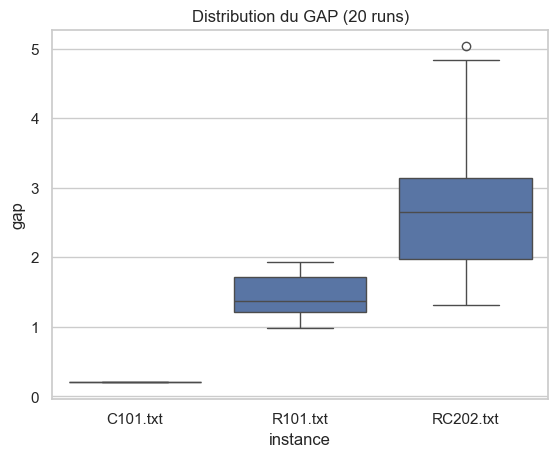

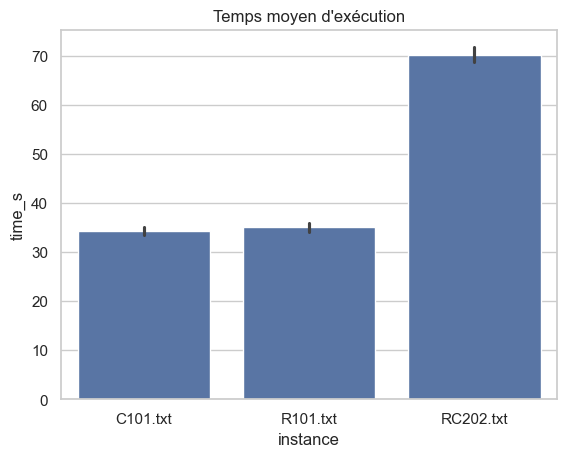

In [2]:
import seaborn as sns, matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Résumé
print(df.groupby("instance")[["cost","gap","time_s"]].agg(["mean","std"]).round(3))

# GAP par instance
sns.boxplot(data=df, x="instance", y="gap")
plt.title("Distribution du GAP (20 runs)")
plt.show()

# Temps moyen
sns.barplot(data=df, x="instance", y="time_s", errorbar="sd")
plt.title("Temps moyen d'exécution")
plt.show()


=== Test loops (0 → 500) ===

loops=0 … 
[auto] C101.txt: I=0, P=80, S=1000, fast=True, nnk=25, init=regret, W=4, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True, nnk=22
[parallel] workers=4, batch=8
[auto] C101.txt: I=0, P=80, S=1001, fast=True, nnk=25, init=regret, W=4, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True, nnk=22
[parallel] workers=4, batch=8
[auto] C101.txt: I=0, P=80, S=1002, fast=True, nnk=25, init=regret, W=4, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True, nnk=22
[parallel] workers=4, batch=8
loops=50 … 
[auto] C101.txt: I=50, P=80, S=1050, fast=True, nnk=25, init=regret, W=4, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True, nnk=22
[parallel] workers=4, batch=8
[auto] C101.txt: I=50, P=80, S=1051, fast=True, nnk=25, init=regret, W=4, T=30
        fam=solomon, n=100, dist≈0.1MB, TL=30s → workers=6, fast=True, nnk=22
[parallel] workers=4, batch=8
[auto] C101.txt

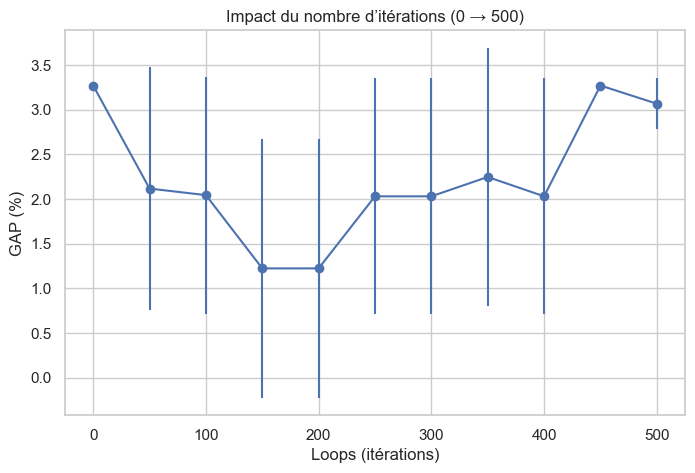

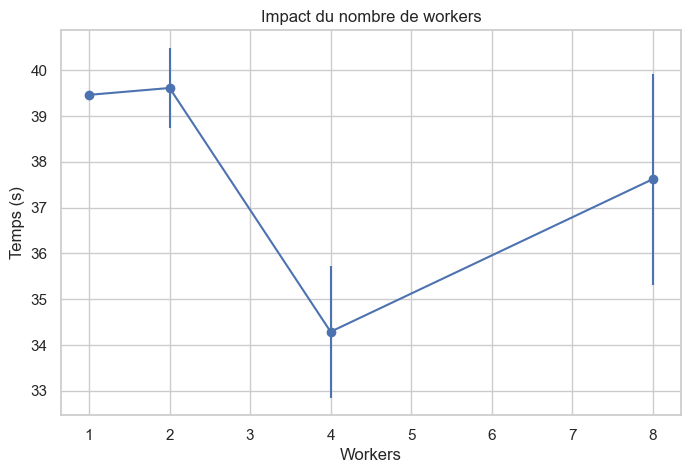

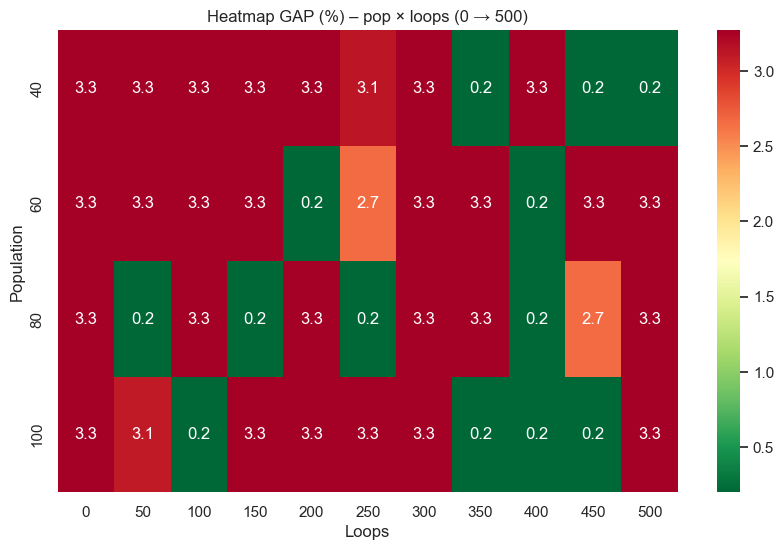


=== FIN ✔️ — Graphes affichés dans Jupyter ===


In [1]:
# ============================================================
#  Étude simple VRPTW – loops (0→500), workers, heatmap
#  Version compatible Jupyter (affiche directement les graphes)
# ============================================================

import re, time, random
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from vrp_solver import solve_file

# ==================== CONFIG =========================
DATA_DIR = Path("data/cvrplib/Vrp-Set-Solomon")
TEST_INSTANCE = DATA_DIR / "C101.txt"

N_RUNS = 3  # répétitions

# Plage d’itérations 0 → 500
LOOPS_RANGE = list(range(0, 501, 50))

# Tests workers
WORKERS_LIST = [1, 2, 4, 8]

# ==================== EXTRACTION =========================
def extract(txt):
    m_cost = re.search(r"cost\s+([\d.]+)", txt, re.I)
    m_gap  = re.search(r"gap\s+([\d.]+)", txt, re.I)
    m_time = re.search(r"time\s+([\d.]+)", txt, re.I)
    return dict(
        cost=float(m_cost.group(1)) if m_cost else np.nan,
        gap=float(m_gap.group(1)) if m_gap else np.nan,
        time=float(m_time.group(1)) if m_time else np.nan
    )

# ============================================================
# 1) IMPACT LOOPS (0 → 500)
# ============================================================

loops_rows = []
print("=== Test loops (0 → 500) ===\n")

for loops in LOOPS_RANGE:
    gaps, times = [], []
    print(f"loops={loops} … ")

    for run in range(N_RUNS):
        seed = 1000 + loops + run
        out = solve_file(str(TEST_INSTANCE), seed=seed,
                         pop=80, loops=loops, nnk=25, workers=4)
        m = extract(out)
        gaps.append(m["gap"])
        times.append(m["time"])

    loops_rows.append(dict(
        loops=loops,
        gap_mean=np.mean(gaps),
        gap_std=np.std(gaps),
        time_mean=np.mean(times),
        time_std=np.std(times)
    ))

df_loops = pd.DataFrame(loops_rows)

# ============================================================
# 2) IMPACT WORKERS
# ============================================================

workers_rows = []
print("\n=== Test workers ===\n")

for w in WORKERS_LIST:
    gaps, times = [], []
    print(f"workers={w} … ")

    for run in range(N_RUNS):
        seed = 4000 + w + run
        out = solve_file(str(TEST_INSTANCE), seed=seed,
                         pop=80, loops=300, nnk=25, workers=w)
        m = extract(out)
        gaps.append(m["gap"])
        times.append(m["time"])

    workers_rows.append(dict(
        workers=w,
        gap_mean=np.mean(gaps),
        gap_std=np.std(gaps),
        time_mean=np.mean(times),
        time_std=np.std(times)
    ))

df_workers = pd.DataFrame(workers_rows)

# ============================================================
# 3) HEATMAP pop × loops (0 → 500)
# ============================================================

print("\n=== Heatmap pop×loops ===\n")

pop_list = [40, 60, 80, 100]
heat = []

for pop in pop_list:
    for loops in LOOPS_RANGE:
        seed = 9000 + pop + loops
        out = solve_file(str(TEST_INSTANCE), seed=seed,
                         pop=pop, loops=loops, nnk=25, workers=4)
        m = extract(out)
        heat.append(dict(pop=pop, loops=loops, gap=m["gap"]))

df_heat = pd.DataFrame(heat)

# ============================================================
#  AFFICHAGE DES GRAPHES DIRECTEMENT DANS JUPYTER
# ============================================================

sns.set_theme(style="whitegrid")

# --- 1) Courbe GAP vs loops
plt.figure(figsize=(8,5))
plt.errorbar(df_loops["loops"], df_loops["gap_mean"],
             yerr=df_loops["gap_std"], marker='o')
plt.title("Impact du nombre d’itérations (0 → 500)")
plt.xlabel("Loops (itérations)")
plt.ylabel("GAP (%)")
plt.grid(True)
plt.show()

# --- 2) Courbe Temps vs workers
plt.figure(figsize=(8,5))
plt.errorbar(df_workers["workers"], df_workers["time_mean"],
             yerr=df_workers["time_std"], marker='o')
plt.title("Impact du nombre de workers")
plt.xlabel("Workers")
plt.ylabel("Temps (s)")
plt.grid(True)
plt.show()

# --- 3) Heatmap pop × loops
pivot = df_heat.pivot(index="pop", columns="loops", values="gap")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="RdYlGn_r")
plt.title("Heatmap GAP (%) – pop × loops (0 → 500)")
plt.xlabel("Loops")
plt.ylabel("Population")
plt.show()

print("\n=== FIN ✔️ — Graphes affichés dans Jupyter ===")
